## 1. Model Import

In [25]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Preparation

In [26]:
df = pd.read_json('../data/processed_data.json')
df.head()

,title,description,price,square,address,estate_type,post_date,post_id,contact_info,extra_infos,link
0,Chính chủ cần bán nhà 2 mặt ngõ phố Hoàn Cầu P...,Tôi cần bán nhà 2 mặt ngõ phố Hoàn Cầu Phường ...,6.800000e+09,45.5,"{'full_address': 'Phường Ô Chợ Dừa , Quận Đống...",Nhà riêng,2023/10/20,580302,"{'name': 'Mr Đông', 'phone': ['0868764888']}",{'Tầng': '4'},https://bds.com.vn/chinh-chu-can-ban-nha-2-mat...
1,CHUẨN SỐNG SANG- KHÔNG GIAN AN LÀNH chỉ có tại...,CHÍNH SÁCH BÁN HÀNG HẤP DẪN NHẤT CHỈ CÓ TẠI TÒ...,3.000000e+09,108.0,"{'full_address': 'Phường Vĩnh Tuy , Quận Hai B...",Chung cư,2023/10/01,97579,"{'name': 'Đỗ Hồng', 'phone': []}","{'Số phòng ngủ': '3', 'Số toilet': '2'}",https://bds.com.vn/chuan-song-sang---khong-gia...
2,"Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ, ngõ...","Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ, ngõ...",2.600000e+09,36.0,"{'full_address': 'Phường Bồ Đề , Quận Long Biê...",Nhà riêng,2023/10/01,87277,"{'name': 'Đỗ Hồng', 'phone': []}","{'Số phòng ngủ': '3', 'Số toilet': '3', 'Tầng'...",https://bds.com.vn/ban-nha-dep-bo-de-36m2-x-3-...
3,"Nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ, ô ...","Bán nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ...",3.200000e+09,32.0,"{'full_address': 'Phường Bồ Đề , Quận Long Biê...",Nhà riêng,2023/10/01,87627,"{'name': 'Đỗ Hồng', 'phone': []}","{'Số phòng ngủ': '3', 'Số toilet': '3', 'Tầng'...",https://bds.com.vn/nha-bo-de-sieu-dep-32m2-x-5...
4,Nhà Phan Đình Phùng 2 thoáng Phân Lô ô tô ...,Mô tả: Do chuyển sang nước ngoài định cư cùng ...,9.000000e+09,42.0,"{'full_address': 'Phường Hàng Mã , Quận Hoàn K...",Nhà riêng,2023/10/01,93144,"{'name': 'Đỗ Hồng', 'phone': []}",{},https://bds.com.vn/nha-phan-dinh-phung-%E2%80%...


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250796 entries, 0 to 250795
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         250786 non-null  object 
 1   description   249642 non-null  object 
 2   price         245946 non-null  float64
 3   square        247809 non-null  float64
 4   address       250796 non-null  object 
 5   estate_type   240015 non-null  object 
 6   post_date     250796 non-null  object 
 7   post_id       250796 non-null  int64  
 8   contact_info  250796 non-null  object 
 9   extra_infos   250796 non-null  object 
 10  link          250796 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 21.0+ MB


In [28]:
df.isna().sum()

title              10
description      1154
price            4850
square           2987
address             0
estate_type     10781
post_date           0
post_id             0
contact_info        0
extra_infos         0
link                0
dtype: int64

In [29]:
df.dtypes

title            object
description      object
price           float64
square          float64
address          object
estate_type      object
post_date        object
post_id           int64
contact_info     object
extra_infos      object
link             object
dtype: object

In [30]:
df = df.dropna(subset=['price', 'square'])
df = df.dropna(subset=['estate_type'])


In [31]:
duplicates = df[df.duplicated(subset=['title', 'description'])]
df = df.drop_duplicates(subset=['title', 'description'], keep='first')
df[['title', 'description']]

,title,description
0,Chính chủ cần bán nhà 2 mặt ngõ phố Hoàn Cầu P...,Tôi cần bán nhà 2 mặt ngõ phố Hoàn Cầu Phường ...
1,CHUẨN SỐNG SANG- KHÔNG GIAN AN LÀNH chỉ có tại...,CHÍNH SÁCH BÁN HÀNG HẤP DẪN NHẤT CHỈ CÓ TẠI TÒ...
2,"Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ, ngõ...","Bán nhà đẹp Bồ Đề 36 m2 x 3 tầng x 2,6 tỉ, ngõ..."
3,"Nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ, ô ...","Bán nhà Bồ Đề siêu đẹp 32 m2 x 5 tầng x 3,2 tỉ..."
4,Nhà Phan Đình Phùng 2 thoáng Phân Lô ô tô ...,Mô tả: Do chuyển sang nước ngoài định cư cùng ...
...,...,...
250784,Bán Nhà Phú diễn-ngõ nông sạch sẽ-40m2- 3.5 tỷ .,Bán Nhà Phú diễn-ngõ nông sạch sẽ-40m2- 3.5 tỷ...
250787,Chính chủ cần nhà Phương Liệt- Giải Phóng- Khu...,"+ Vị trí đắc địa, trung tâm quận Thanh Xuân, g..."
250791,THÁI THỊNH- NGÕ NÔNG RỘNG THOÁNG- DIỆN TÍCH: 4...,THÁI THỊNH- NGÕ NÔNG RỘNG THOÁNG THÔNG 1 NHÀ...
250794,"HÀ ĐẸP, THÁI THỊNH Ô TÔ ĐỖ, THOÁNG TRƯỚC SAU, ...","NHÀ ĐẸP, THÁI THỊNH Ô TÔ ĐỖ, THOÁNG TRƯỚC SAU,..."


In [32]:
df.drop(df[df['price'] == 0].index, inplace=True)

In [33]:
# Change 'price' column type and calculate price per square 
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['square'] = pd.to_numeric(df['square'], errors='coerce')
df['price_per_square'] = df['price'] / df['square']
df[['price', 'square', 'price_per_square']].head(10)

,price,square,price_per_square
0,6.800000e+09,45.5,1.494505e+08
1,3.000000e+09,108.0,2.777778e+07
2,2.600000e+09,36.0,7.222222e+07
3,3.200000e+09,32.0,1.000000e+08
4,9.000000e+09,42.0,2.142857e+08
5,2.200000e+09,40.0,5.500000e+07
7,3.300000e+09,34.0,9.705882e+07
8,1.150000e+10,60.0,1.916667e+08
11,3.000000e+09,80.0,3.750000e+07
12,6.500000e+09,120.0,5.416667e+07


In [34]:
# Drop outliers price
df.drop(df[df['price_per_square'] >= 3e9].index, inplace=True)

In [35]:
## Normalize all the text columns in dataframe

import unicodedata

def normalize_text(text):
    if isinstance(text, str):  # Check if the text is a string
        text = unicodedata.normalize('NFC', text)  # Normalize Unicode to NFC form
        text = text.title()
        return text
    else:
        return text  # Return the value as is for non-string types

# Apply the normalize_text function to all string columns in the dataframe
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is of string type
        df[col] = df[col].apply(normalize_text)

print(df.head())

                                               title  \
0  Chính Chủ Cần Bán Nhà 2 Mặt Ngõ Phố Hoàn Cầu P...   
1  Chuẩn Sống Sang- Không Gian An Lành Chỉ Có Tại...   
2  Bán Nhà Đẹp Bồ Đề 36 M2 X 3 Tầng X 2,6 Tỉ, Ngõ...   
3  Nhà Bồ Đề Siêu Đẹp 32 M2 X 5 Tầng X 3,2 Tỉ, Ô ...   
4  Nhà Phan Đình Phùng  2 Thoáng  Phân Lô  Ô Tô  ...   

                                         description         price  square  \
0  Tôi Cần Bán Nhà 2 Mặt Ngõ Phố Hoàn Cầu Phường ...  6.800000e+09    45.5   
1  Chính Sách Bán Hàng Hấp Dẫn Nhất Chỉ Có Tại Tò...  3.000000e+09   108.0   
2  Bán Nhà Đẹp Bồ Đề 36 M2 X 3 Tầng X 2,6 Tỉ, Ngõ...  2.600000e+09    36.0   
3  Bán Nhà Bồ Đề Siêu Đẹp 32 M2 X 5 Tầng X 3,2 Tỉ...  3.200000e+09    32.0   
4  Mô Tả: Do Chuyển Sang Nước Ngoài Định Cư Cùng ...  9.000000e+09    42.0   

                                             address estate_type   post_date  \
0  {'full_address': 'Phường Ô Chợ Dừa , Quận Đống...   Nhà Riêng  2023/10/20   
1  {'full_address': 'Phường Vĩnh T

In [36]:
# Clean address column
def clean_address(address):
    if isinstance(address, dict) and 'full_address' in address:
        return address['full_address']
    return address

df['address'] = df['address'].apply(clean_address)
df['address']

0                  Phường Ô Chợ Dừa , Quận Đống Đa , Hà Nội
1              Phường Vĩnh Tuy , Quận Hai Bà Trưng , Hà Nội
2                    Phường Bồ Đề , Quận Long Biên , Hà Nội
3                    Phường Bồ Đề , Quận Long Biên , Hà Nội
4                  Phường Hàng Mã , Quận Hoàn Kiếm , Hà Nội
                                ...                        
250784    Đường Phú Diễn , Phường Phú Diễn , Quận Bắc Từ...
250787    Phố Phương Liệt , Phường Phương Liệt , Quận Th...
250791    Phố Thái Thịnh , Phường Thịnh Quang , Quận Đốn...
250794    Phố Thái Thịnh , Phường Thịnh Quang , Quận Đốn...
250795    Đông Anh Đường Tiên Kha , Xã Tiên Dương , Huyệ...
Name: address, Length: 142463, dtype: object

In [37]:
## Extract district from address column
import re

df['district'] = df['address'].str.extract(r'(Quận[^,]*|Huyện[^,]*|Thị Xã[^,]*)')

# Clean up redundant mentions of 'Quận Quận' or 'Huyện Huyện'
df['district'] = df['district'].str.replace(r'(Quận|Huyện|Thị Xã)\s+', '', regex=True)

# Remove trailing info after 'Hà Nội', 'HN', 'Phố', 'Đường', and other unwanted information
df['district'] = df['district'].str.replace(r' - Hn.*| - Hà Nội.*| Phố.*| Đường.*| Xã.*|,.*', '', regex=True)

# Define the list of valid district names in Hanoi
valid_districts = [
    'Đống Đa', 'Hai Bà Trưng', 'Long Biên', 'Hoàn Kiếm', 'Hoàng Mai', 'Ba Đình',
    'Nam Từ Liêm', 'Hà Đông', 'Cầu Giấy', 'Gia Lâm', 'Tây Hồ', 'Thanh Xuân',
    'Bắc Từ Liêm', 'Thanh Trì', 'Hoài Đức', 'Đông Anh', 'Thạch Thất', 'Mê Linh',
    'Sóc Sơn', 'Ba Vì', 'Quốc Oai', 'Đan Phượng', 'Thường Tín', 'Thanh Oai',
    'Chương Mỹ', 'Phú Xuyên', 'Ứng Hòa', 'Phúc Thọ', 'Mỹ Đức', 'Sơn Tây'
]

# Create a regex pattern to match valid district names
valid_district_pattern = r'(' + '|'.join([re.escape(d) for d in valid_districts]) + r')'

# Create a function to clean district names
def clean_district(district):
    if pd.isna(district) or district == '':
        return None
    if district.strip().isdigit():
        return None
    
    # Extract valid district from the string
    match = re.search(valid_district_pattern, district, re.IGNORECASE)
    if match:
        return match.group(0).title()
    return None 

df['district'] = df['district'].apply(clean_district)
df_cleaned = df[df['district'].notna()]

df['district'].unique()

array(['Đống Đa', 'Hai Bà Trưng', 'Long Biên', 'Hoàn Kiếm', 'Hoàng Mai',
       'Ba Đình', 'Nam Từ Liêm', 'Gia Lâm', 'Tây Hồ', 'Cầu Giấy',
       'Thanh Xuân', 'Bắc Từ Liêm', 'Thanh Trì', 'Hoài Đức', 'Đông Anh',
       'Hà Đông', 'Sơn Tây', 'Sóc Sơn', None, 'Mê Linh', 'Thạch Thất',
       'Đan Phượng', 'Thanh Oai', 'Quốc Oai', 'Thường Tín', 'Ba Vì',
       'Chương Mỹ', 'Phú Xuyên', 'Ứng Hòa', 'Phúc Thọ', 'Mỹ Đức'],
      dtype=object)

In [38]:
## Extract ward from address column

# Function to extract only ward names (Phường/Xã/Thị Trấn) and remove unnecessary parts
def extract_ward_only(address_text):
    if pd.isna(address_text):
        return None
    
    # Search for keywords 'Phường', 'Xã', or 'Thị Trấn' and extract relevant part
    match = re.search(r'(Phường|Xã|Thị Trấn)\s+[\w\s]+', address_text)
    
    if match:
        ward = match.group(0).strip().title()  # Extract the matched string
        
        # If the ward contains unwanted keywords like 'Quận', 'Huyện', 'Đường', discard it
        if any(keyword in ward for keyword in ['Quận', 'Huyện', 'Đường']):
            ward = None  # Discard the string if unwanted keywords are present
        
    else:
        ward = None  # Return None if no match is found
    
    return ward

df['ward'] = df['address'].apply(extract_ward_only)

# Remove entries that are too long or contain unwanted words
df['ward'] = df['ward'].apply(lambda x: None if pd.isna(x) or len(x) > 50 else x)
df['ward'].unique()


array(['Phường Ô Chợ Dừa', 'Phường Vĩnh Tuy', 'Phường Bồ Đề',
       'Phường Hàng Mã', 'Phường Lĩnh Nam', 'Phường Cống Vị',
       'Phường Mỹ Đình 1', 'Phường Cầu Diễn', 'Phường Đại Kim',
       'Phường Ngọc Thụy', 'Phường Láng Hạ', 'Thị Trấn Trâu Quỳ',
       'Phường Hoàng Văn Thụ', 'Phường Khương Thượng', 'Phường Thạch Bàn',
       'Phường Ngọc Hà', 'Phường Nhật Tân', 'Phường Tân Mai',
       'Phường Thổ Quan', 'Phường Quan Hoa', 'Phường Khương Mai',
       'Phường Dịch Vọng Hậu', 'Phường Phú Thượng', 'Phường Thụy Phương',
       'Phường Định Công', 'Xã Phú Thị', 'Phường Thụy Khuê',
       'Phường Xuân La', 'Phường Long Biên', 'Phường Quán Thánh',
       'Phường Thanh Xuân Nam', 'Phường Nhân Chính', 'Phường Hạ Đình',
       'Phường Thượng Đình', 'Phường Văn Miếu', 'Phường Minh Khai',
       'Phường Giáp Bát', 'Phường Dịch Vọng', 'Phường Nghĩa Tân',
       'Phường Khương Đình', 'Phường Khương Trung',
       'Phường Thanh Xuân Trung', 'Xã Tân Triều', 'Phường Thượng Thanh',
       'Phườ

In [39]:
df['ward'].value_counts()


ward
Phường Trung Hòa     2986
Phường Bồ Đề         2889
Phường Ô Chợ Dừa     2802
Phường Nghĩa Đô      2704
Phường Nhân Chính    2412
                     ... 
Xã Minh Tân             1
Xã Cam Thượng           1
Xã Thụy An              1
Xã Cao Thành            1
Xã Hồng Dương           1
Name: count, Length: 453, dtype: int64

In [40]:
df['estate_type'].value_counts()

estate_type
Nhà Riêng                    48350
Nhà Ngõ, Hẻm                 31387
Nhà Mặt Tiền                 27274
Đất                          10216
Chung Cư                      7843
Nhà Phố                       5302
Biệt Thự Liền Kề              3397
Đất Nền, Phân Lô              3203
Biệt Thự                      2404
Phòng Trọ, Nhà Trọ            1116
Văn Phòng                      556
Nhà Hàng, Khách Sạn            292
Đất Nền Dự Án                  258
Các Loại Khác                  248
Nhà Đất                        231
Shop, Kiot, Quán               108
Mặt Bằng, Cửa Hàng              68
Kho Xưởng                       61
Mặt Bằng                        57
Trang Trại Khu Nghỉ Dưỡng       46
Nhà Xưởng                       22
Đất Nông, Lâm Nghiệp            19
Trang Trại                       5
Name: count, dtype: int64

In [41]:
# Change to datetime
df['post_date'] = pd.to_datetime(df['post_date'])
df.dtypes

title                       object
description                 object
price                      float64
square                     float64
address                     object
estate_type                 object
post_date           datetime64[ns]
post_id                      int64
contact_info                object
extra_infos                 object
link                        object
price_per_square           float64
district                    object
ward                        object
dtype: object

In [42]:
import ast
import pandas as pd

# Assuming df is the dataframe and extra_infos is a column with dictionary-like strings
# Convert 'extra_infos' from string to dictionary
df['extra_infos'] = df['extra_infos'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Lowercase keys in 'extra_infos' dictionary
df['extra_infos'] = df['extra_infos'].apply(lambda x: {k.lower(): v for k, v in x.items()} if isinstance(x, dict) else x)

# Extract 'Tầng' (Specific Floor), 'Số phòng ngủ', and 'Số toilet' 
df['specific_floor'] = df['extra_infos'].apply(lambda x: x.get('tầng', None) if isinstance(x, dict) else None)
df['bedrooms'] = df['extra_infos'].apply(lambda x: x.get('số phòng ngủ', None) if isinstance(x, dict) else None)
df['toilets'] = df['extra_infos'].apply(lambda x: x.get('số toilet', None) if isinstance(x, dict) else None)

# Convert the extracted columns to numeric (if needed)
df['specific_floor'] = pd.to_numeric(df['specific_floor'], errors='coerce')
df['bedrooms'] = pd.to_numeric(df['bedrooms'], errors='coerce')
df['toilets'] = pd.to_numeric(df['toilets'], errors='coerce')

# Fill NaN values with 0 or keep them as NaN based on requirement
df['specific_floor'] = df['specific_floor'].fillna(0).astype(int)
df['bedrooms'] = df['bedrooms'].fillna(0).astype(int)
df['toilets'] = df['toilets'].fillna(0).astype(int)

df[['extra_infos', 'specific_floor', 'bedrooms', 'toilets']].head(10)

,extra_infos,specific_floor,bedrooms,toilets
0,{'tầng': '4'},4,0,0
1,"{'số phòng ngủ': '3', 'số toilet': '2'}",0,3,2
2,"{'số phòng ngủ': '3', 'số toilet': '3', 'tầng'...",3,3,3
3,"{'số phòng ngủ': '3', 'số toilet': '3', 'tầng'...",5,3,3
4,{},0,0,0
5,"{'số phòng ngủ': '4', 'số toilet': '4', 'tầng'...",4,4,4
7,{},0,0,0
8,{'tầng': '7'},7,0,0
11,{},0,0,0
12,"{'số phòng ngủ': '3', 'số toilet': '2'}",0,3,2


## 3. Data Analysis

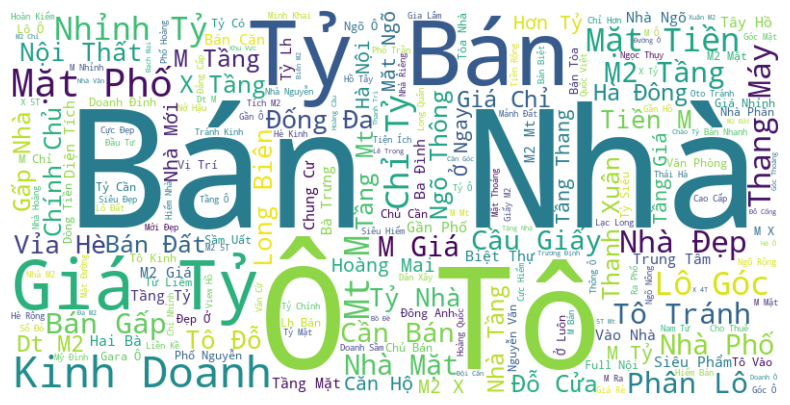

In [43]:
## WorldCloud for 'title' column
from wordcloud import WordCloud 

# Prepare the text data from the 'title' column
text = ' '.join(df['title'].dropna().tolist())

# Generate the word cloud from the 'title' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

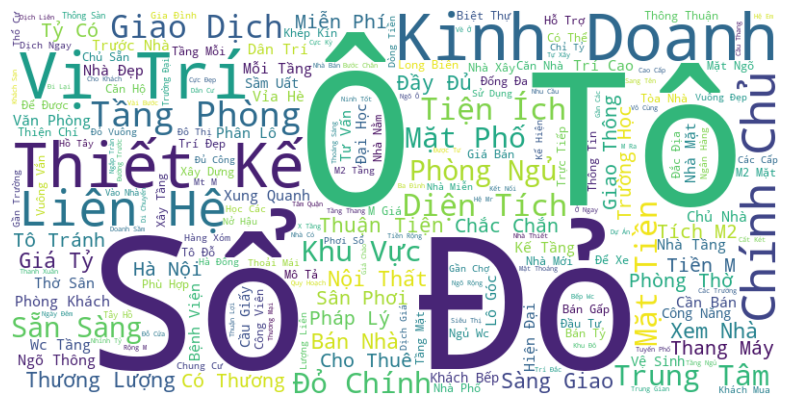

In [44]:
## Wolrd Cloud for 'description' column
text = ' '.join(df['description'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

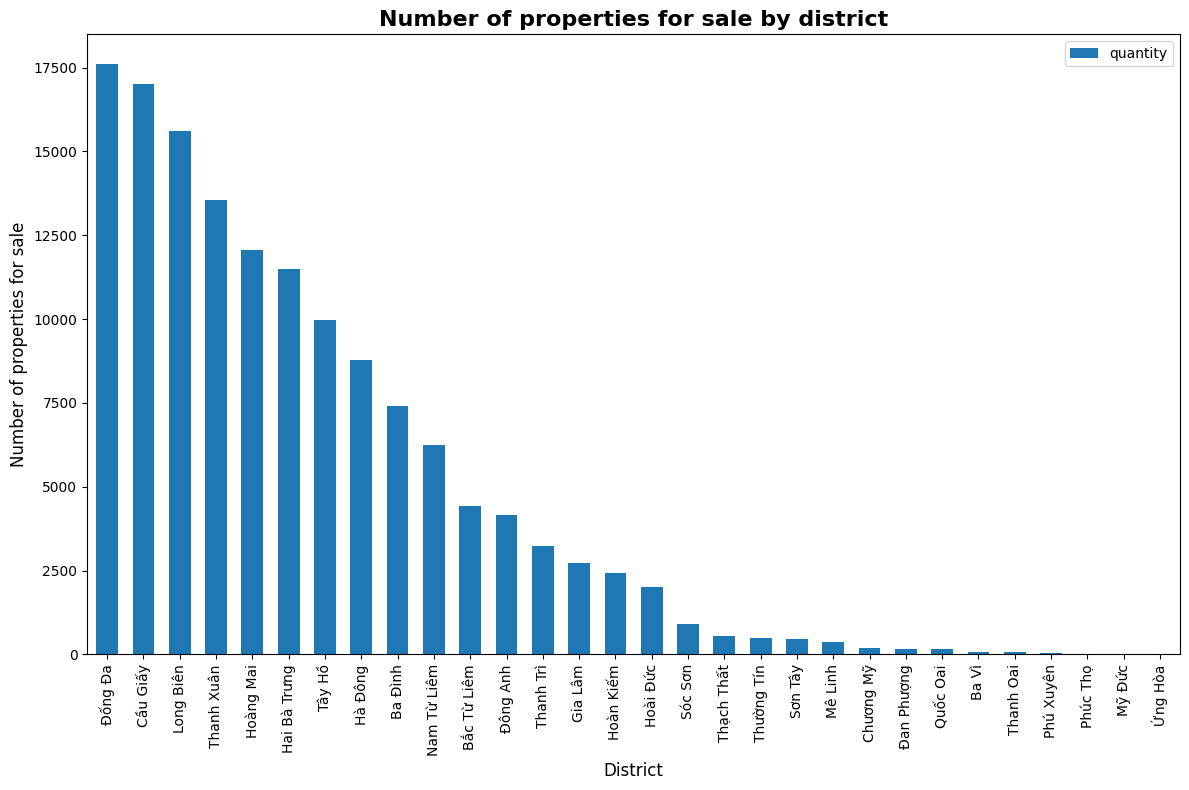

In [45]:
# Create bar plot according to district
district_count = df['district'].value_counts()

plt.figure(figsize=(12,8))
district_count.plot(kind='bar', width=0.6)

plt.title('Number of properties for sale by district', fontsize=16, fontweight='bold')
plt.xlabel('District', fontsize=12)
plt.ylabel('Number of properties for sale', fontsize=12)
plt.xticks(rotation=90)

# Add legend
plt.legend(['quantity'], loc='upper right')
plt.grid(False)

# Show the plot
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

In [46]:
import geopandas as gpd
import plotly.express as px

vietnam_shapefile = gpd.read_file('/Users/tranthiphuongthao/Desktop/batdongsanhanoi/data/gadm41_VNM_shp/gadm41_VNM_2.shp')
vietnam_shapefile


,GID_2,GID_0,COUNTRY,GID_1,NAME_1,NL_NAME_1,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry
0,VNM.1.1_1,VNM,Vietnam,VNM.1_1,An Giang,NA,An Phú,An Phu,NA,Huyện,District,NA,VN.TT.AL,"POLYGON ((105.15658 10.82866, 105.15828 10.809..."
1,VNM.1.3_1,VNM,Vietnam,VNM.1_1,An Giang,NA,Châu Đốc,Chau Doc,NA,Thành phố,City,NA,VN.KG.AB,"POLYGON ((105.10498 10.63827, 105.08154 10.614..."
2,VNM.1.4_1,VNM,Vietnam,VNM.1_1,An Giang,NA,Châu Phú,Chau Phu,NA,Huyện,District,NA,VN.HP.AD,"POLYGON ((105.1879 10.46028, 105.18269 10.4589..."
3,VNM.1.5_1,VNM,Vietnam,VNM.1_1,An Giang,NA,Châu Thành,Chau Thanh,NA,Huyện,District,NA,VN.GL.AK,"POLYGON ((105.3709 10.36225, 105.3695 10.35585..."
4,VNM.1.2_1,VNM,Vietnam,VNM.1_1,An Giang,NA,Chợ Mới,Cho Moi,NA,Huyện,District,NA,VN.BD.AL,"POLYGON ((105.48716 10.5395, 105.48838 10.5422..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,VNM.63.5_1,VNM,Vietnam,VNM.63_1,Yên Bái,NA,Trấn Yên,Tran Yen,NA,Huyện,District,NA,VN.BN.YP,"POLYGON ((104.89278 21.59124, 104.89629 21.587..."
706,VNM.63.6_1,VNM,Vietnam,VNM.63_1,Yên Bái,NA,Văn Chấn,Van Chan,NA,Huyện,District,NA,VN.TQ.YS,"POLYGON ((104.87263 21.34886, 104.87083 21.352..."
707,VNM.63.7_1,VNM,Vietnam,VNM.63_1,Yên Bái,NA,Văn Yên,Van Yen,NA,Huyện,District,NA,VN.NA.YT,"POLYGON ((104.71706 21.73527, 104.71885 21.733..."
708,VNM.63.8_1,VNM,Vietnam,VNM.63_1,Yên Bái,NA,Yên Bái,Yen Bai,NA,Thành phố,City,NA,VN.BG.YT,"POLYGON ((104.87248 21.68115, 104.87209 21.680..."


In [47]:
# Filter the shapefile for rows where NAME_1 contains 'Hà Nội'
hanoi_shapefile = vietnam_shapefile[vietnam_shapefile['NAME_1'] == 'Hà Nội']
hanoi_shapefile['NAME_2'].unique()

# Save filtered shapefile
hanoi_shapefile.to_file("hanoi_shapefile.shp")

/var/folders/01/g1vgr0ks4139hz98k4c2r3nr0000gn/T/ipykernel_23686/543281425.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(hanoi_map_with_density.geometry.centroid.x,
/var/folders/01/g1vgr0ks4139hz98k4c2r3nr0000gn/T/ipykernel_23686/543281425.py:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hanoi_map_with_density.geometry.centroid.y,


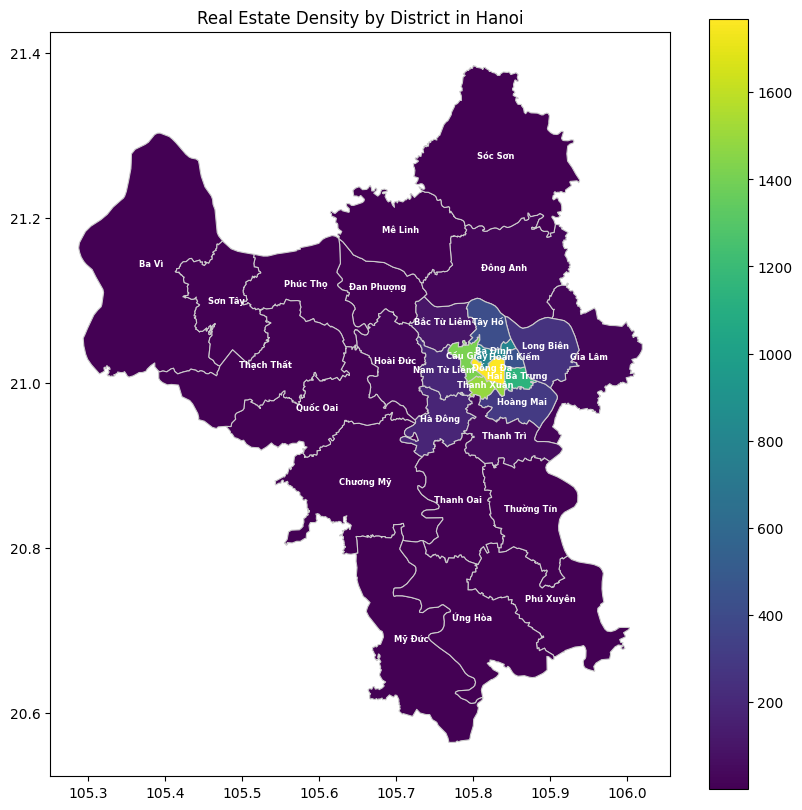

In [48]:
## Visualize real estate density on the map
area_df = pd.read_excel('/Users/tranthiphuongthao/Desktop/batdongsanhanoi/data/hanoi_district_areas.xlsx')
df = pd.merge(df, area_df[['district', 'district_area (km2)']], on='district', how='left')

# Group by district and count the number of real estate listings in each district
real_estate_count = df.groupby('district').size().reset_index(name='listing_count')

# Merge listing counts with the area data
real_estate_density_df = pd.merge(real_estate_count, area_df[['district', 'district_area (km2)']], on='district')

# Calculate density (listings per square km)
real_estate_density_df['density'] = real_estate_density_df['listing_count'] / real_estate_density_df['district_area (km2)']

# Rename the 'NAME_2' column as 'district' in the shapefile to ensure consistency with other dataframes
hanoi_shapefile = hanoi_shapefile.rename(columns={'NAME_2': 'district'})

# Merge the density data with the shapefile data
hanoi_map_with_density = hanoi_shapefile.merge(real_estate_density_df, on='district')

# Plot the map, coloring by density
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
hanoi_map_with_density.plot(column='density', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add district names at the centroids of each district
for x, y, label in zip(hanoi_map_with_density.geometry.centroid.x, 
                       hanoi_map_with_density.geometry.centroid.y, 
                       hanoi_map_with_density['district']):
    ax.text(x, y, label, fontsize=6, ha='center', color='white', fontweight='bold')

plt.grid(False)
plt.title('Real Estate Density by District in Hanoi')
plt.show()

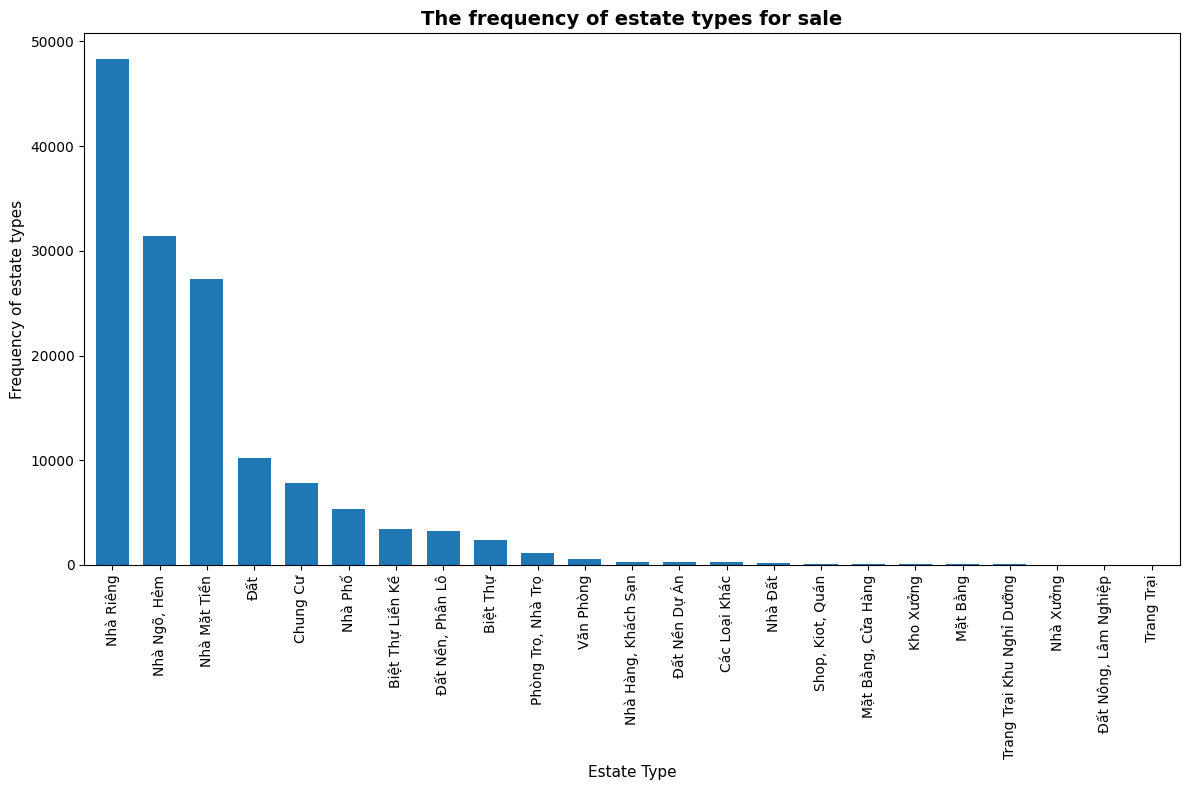

In [49]:
# Create bar plot according to estate type
estate_type_count = df['estate_type'].value_counts()

plt.figure(figsize=(12,8))
estate_type_count.plot(kind='bar', width=0.7)

plt.title('The frequency of estate types for sale', fontsize=14, fontweight='bold')
plt.xlabel('Estate Type', fontsize=11)
plt.ylabel('Frequency of estate types', fontsize=11)
plt.xticks(rotation=90)

plt.grid(False)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlap
plt.show()

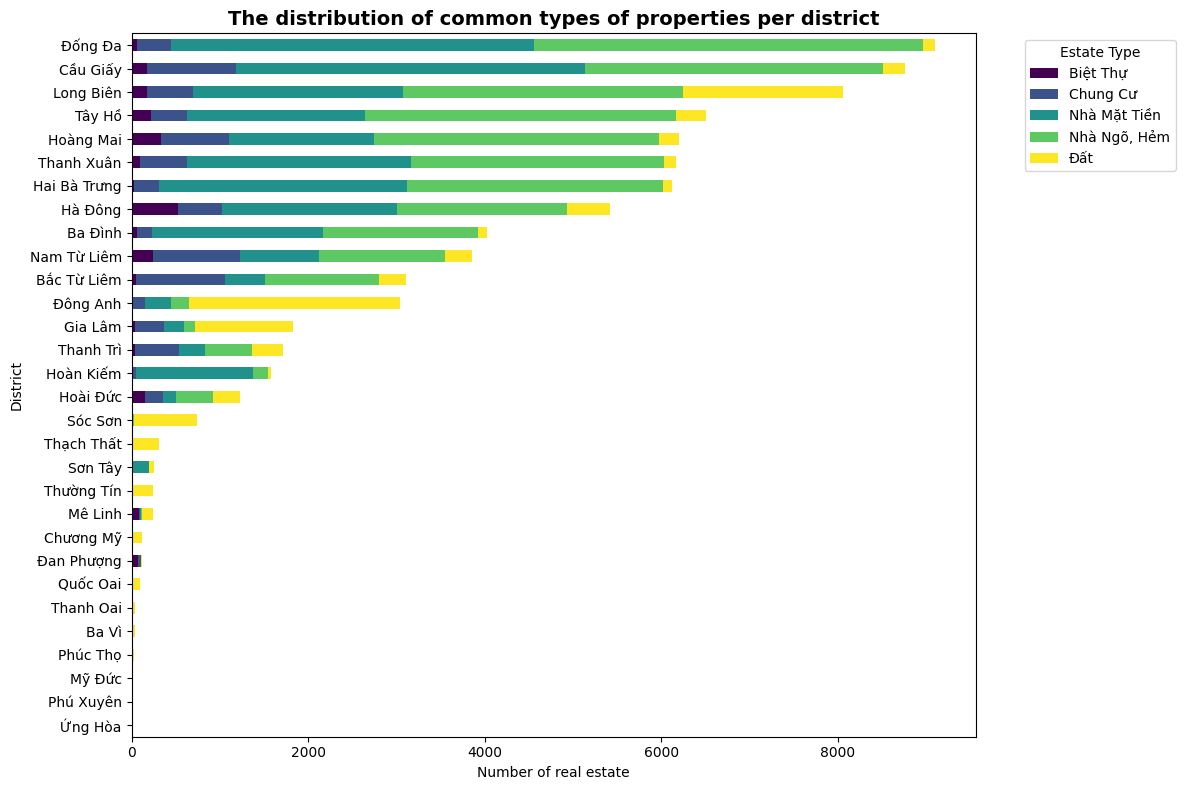

In [50]:
# Define the most 5 common estate types to filter
filtered_estate_types = ['Biệt Thự', 'Chung Cư', 'Nhà Mặt Tiền', 'Nhà Ngõ, Hẻm', 'Đất']

# Filter the DataFrame for only these estate types
df_filtered = df[df['estate_type'].isin(filtered_estate_types)]

# Group by district and estate type, and count the number of estate types per district
grouped = df_filtered.groupby(['district', 'estate_type']).size().reset_index(name='count')

# Pivot the data to have estate types as columns
pivot_df = grouped.pivot(index='district', columns='estate_type', values='count').fillna(0)

# Calculate the total count of properties in each district
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort the districts by the total count in descending order
pivot_df = pivot_df.sort_values('Total', ascending=True)

# Drop the 'Total' column after sorting
pivot_df = pivot_df.drop(columns='Total')

# Plot the data as a stacked bar chart
ax = pivot_df.plot(kind='barh', stacked=True, figsize=(12, 8), cmap='viridis')

# Add labels and title
plt.title('The distribution of common types of properties per district', fontsize=14, fontweight='bold')
plt.xlabel('Number of real estate')
plt.ylabel('District')

# Add legend with title
plt.legend(title='Estate Type', bbox_to_anchor=(1.05, 1))
plt.grid(False)
# Show the plot
plt.tight_layout()
plt.show()

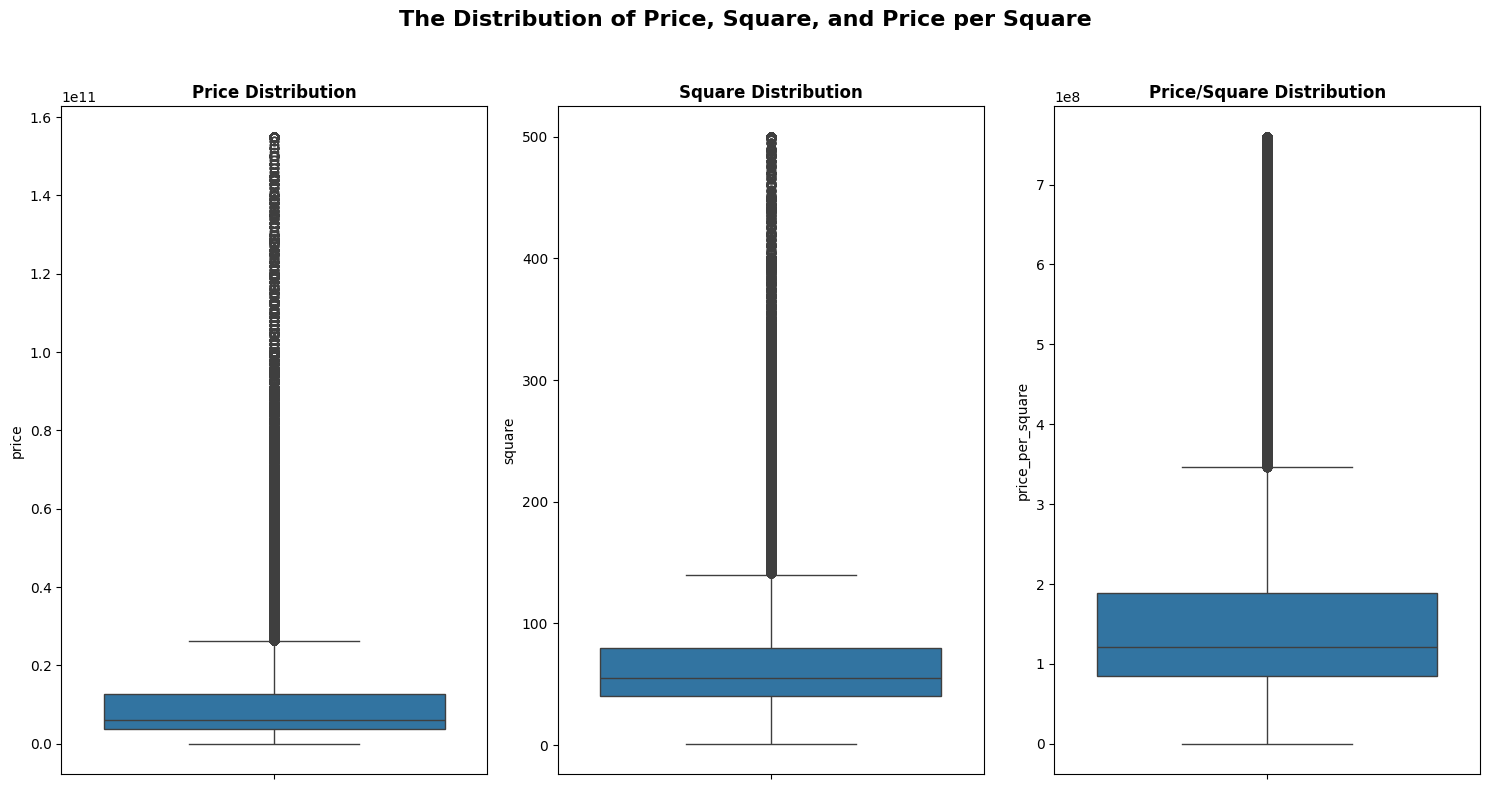

In [51]:
import numpy as np

# Ensure that the relevant columns are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['square'] = pd.to_numeric(df['square'], errors='coerce')
df['price_per_square'] = pd.to_numeric(df['price_per_square'], errors='coerce')

# Cap the values at the 99th percentile to remove extreme outliers
price_cap = np.percentile(df['price'].dropna(), 99)
square_cap = np.percentile(df['square'].dropna(), 99)
price_per_square_cap = np.percentile(df['price_per_square'].dropna(), 99)

# Apply the cap to the dataframe
df['price'] = np.clip(df['price'], None, price_cap)
df['square'] = np.clip(df['square'], None, square_cap)
df['price_per_square'] = np.clip(df['price_per_square'], None, price_per_square_cap)

fig, axs = plt.subplots(1, 3, figsize=(15, 8))

# Boxplot for price with capped values
sns.boxplot(y=df['price'], ax=axs[0])
axs[0].set_title('Price Distribution', fontsize=12, fontweight='bold')

# Boxplot for square with capped values
sns.boxplot(y=df['square'], ax=axs[1])
axs[1].set_title('Square Distribution', fontsize=12, fontweight='bold')

# Boxplot for price per square with capped values
sns.boxplot(y=df['price_per_square'], ax=axs[2])
axs[2].set_title('Price/Square Distribution', fontsize=12, fontweight='bold')

plt.suptitle('The Distribution of Price, Square, and Price per Square', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

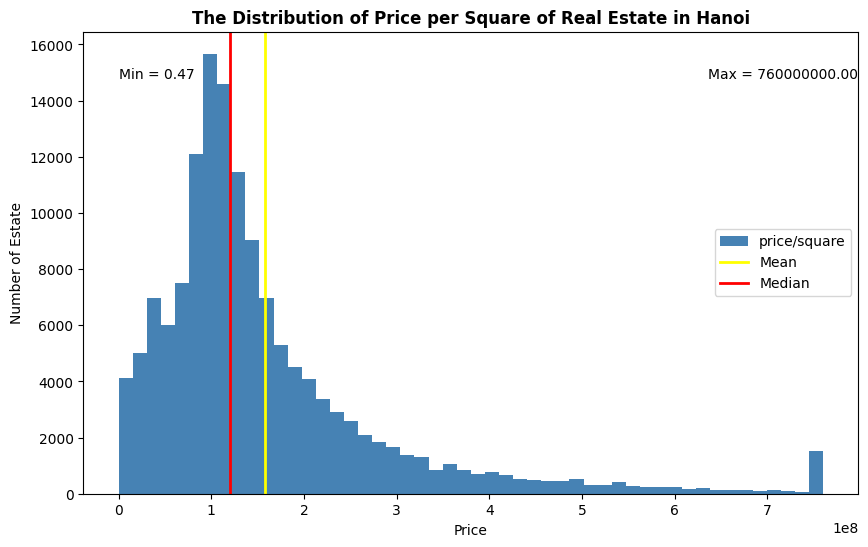

In [52]:
mean_value = df['price_per_square'].mean()
median_value = df['price_per_square'].median()
max_value = df['price_per_square'].max()
min_value = df['price_per_square'].min()

# Plot histogram for price_per_square for this estate_type
plt.figure(figsize=(10, 6))
plt.hist(df['price_per_square'], bins=50, color='steelblue', alpha=1.0, label='price/square')

# Add mean and median lines
plt.axvline(mean_value, color='yellow', linestyle='-', linewidth=2, label='Mean')
plt.axvline(median_value, color='red', linestyle='-', linewidth=2, label='Median')

# Annotations for min and max
plt.text(0, plt.ylim()[1] * 0.9, f'Min = {min_value:.2f}', ha='left', fontsize=10)
plt.text(plt.xlim()[1], plt.ylim()[1] * 0.9, f'Max = {max_value:.2f}', ha='right', fontsize=10)

# Customize labels and title
plt.xlabel('Price', fontsize=10)
plt.ylabel('Number of Estate', fontsize=10)
plt.title('The Distribution of Price per Square of Real Estate in Hanoi', fontsize=12, fontweight='bold')

plt.legend(loc='best')
plt.grid(False)
plt.show()


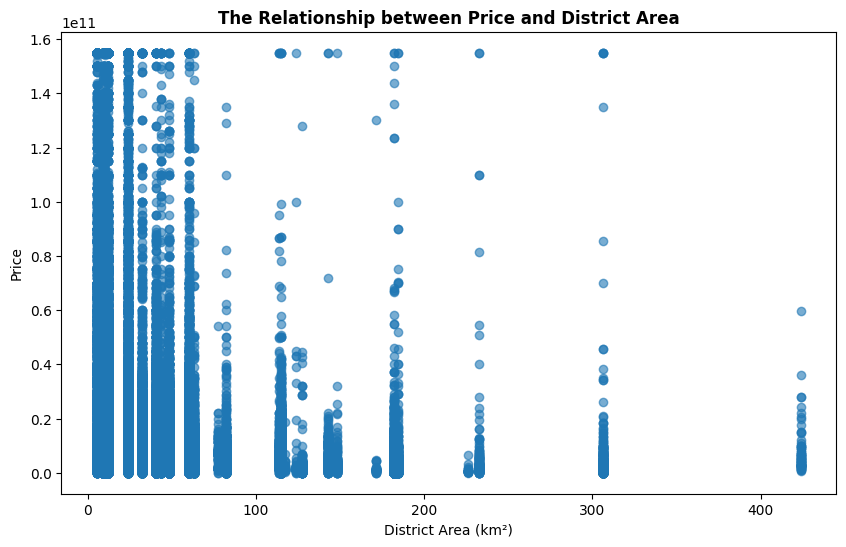

In [53]:
# Ensure the relevant columns are numeric
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['district_area (km2)'] = pd.to_numeric(df['district_area (km2)'], errors='coerce')

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['district_area (km2)'], df['price'], alpha=0.6)

# Add title and labels
plt.title('The Relationship between Price and District Area', fontsize=12, fontweight='bold')
plt.xlabel('District Area (km²)', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10) 

# Display the plot
plt.grid(False)
plt.show()

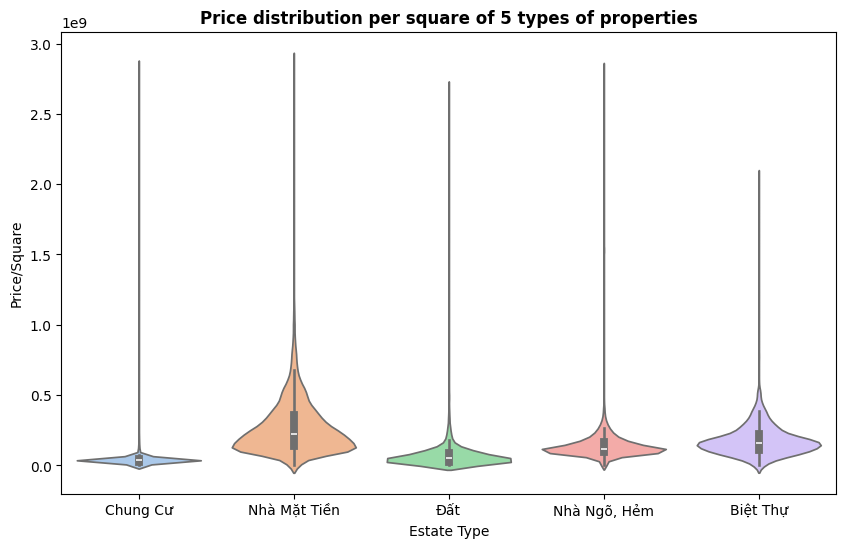

In [54]:
plt.figure(figsize=(10,6))
sns.violinplot(x='estate_type', y='price_per_square', data=df_filtered, hue='estate_type', palette='pastel')

# Set the title and labels
plt.title('Price distribution per square of 5 types of properties', fontsize=12, fontweight='bold')
plt.xlabel('Estate Type', fontsize=10)
plt.ylabel('Price/Square', fontsize=10)

# Show the plot
plt.show()

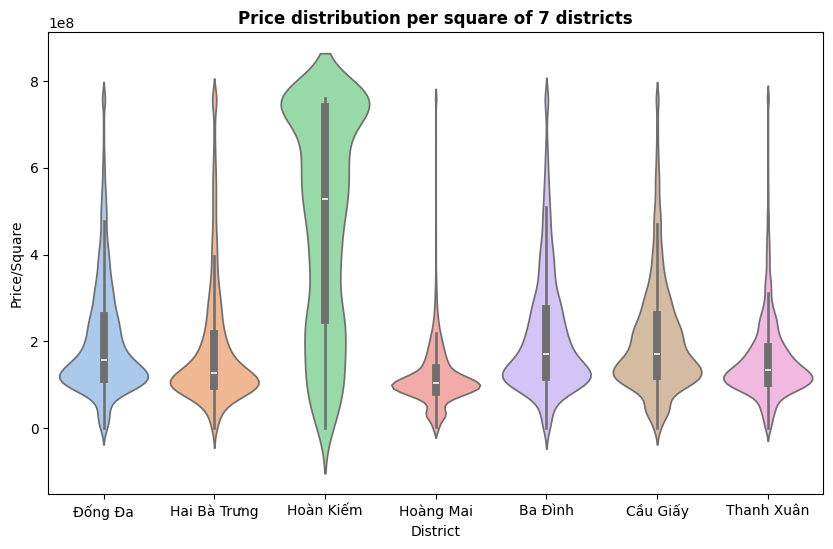

In [56]:
some_districts = ['Đống Đa', 'Hai Bà Trưng', 'Hoàn Kiếm', 'Hoàng Mai', 'Ba Đình', 'Cầu Giấy', 'Thanh Xuân']
filtered_district = df[df['district'].isin(some_districts)]

plt.figure(figsize=(10,6))
sns.violinplot(x='district', y='price_per_square', data=filtered_district, hue='district', palette='pastel')

# Set the title and labels
plt.title('Price distribution per square of 7 districts', fontsize=12, fontweight='bold')
plt.xlabel('District', fontsize=10)
plt.ylabel('Price/Square', fontsize=10)

# Show the plot
plt.show()

/var/folders/01/g1vgr0ks4139hz98k4c2r3nr0000gn/T/ipykernel_23686/2987744412.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(hanoi_map_with_avg_price.geometry.centroid.x,
/var/folders/01/g1vgr0ks4139hz98k4c2r3nr0000gn/T/ipykernel_23686/2987744412.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hanoi_map_with_avg_price.geometry.centroid.y,


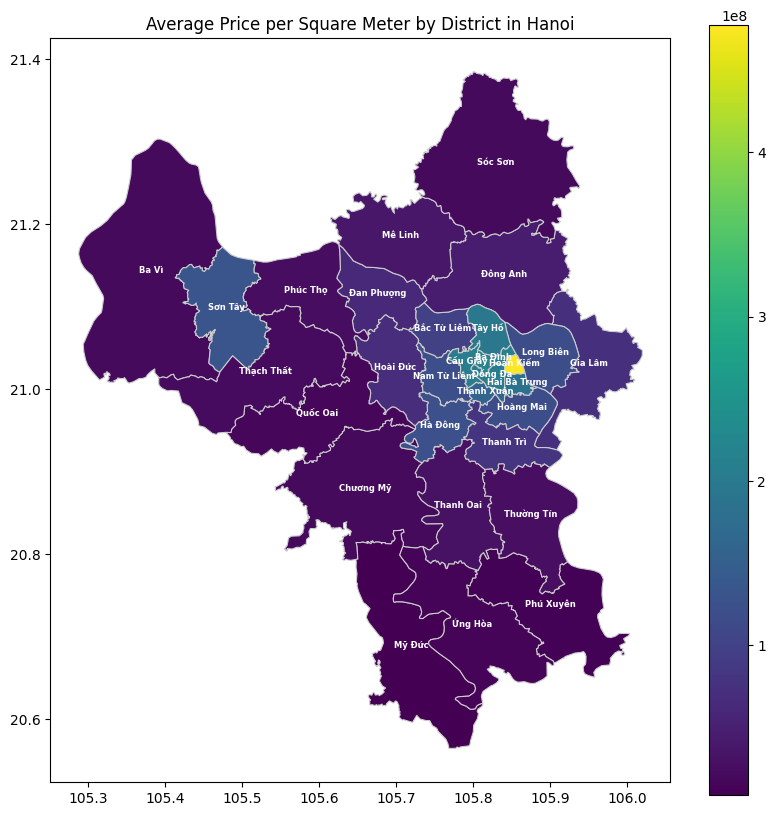

In [57]:
# Group by district and calculate the average price per square meter in each district
avg_price_per_square_df = df.groupby('district')['price_per_square'].mean().reset_index()

# Merge the average price data with the area data
avg_price_per_district_df = pd.merge(avg_price_per_square_df, area_df[['district', 'district_area (km2)']], on='district', how='left')

hanoi_map_with_avg_price = hanoi_shapefile.merge(avg_price_per_district_df, on='district')
# Plot the map, coloring by average price per square meter
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
hanoi_map_with_avg_price.plot(column='price_per_square', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add district names at the centroids of each district
for x, y, label in zip(hanoi_map_with_avg_price.geometry.centroid.x, 
                       hanoi_map_with_avg_price.geometry.centroid.y, 
                       hanoi_map_with_avg_price['district']):
    ax.text(x, y, label, fontsize=6, ha='center', color='white', fontweight='bold')

plt.grid(False)
plt.title('Average Price per Square Meter by District in Hanoi')
plt.show()


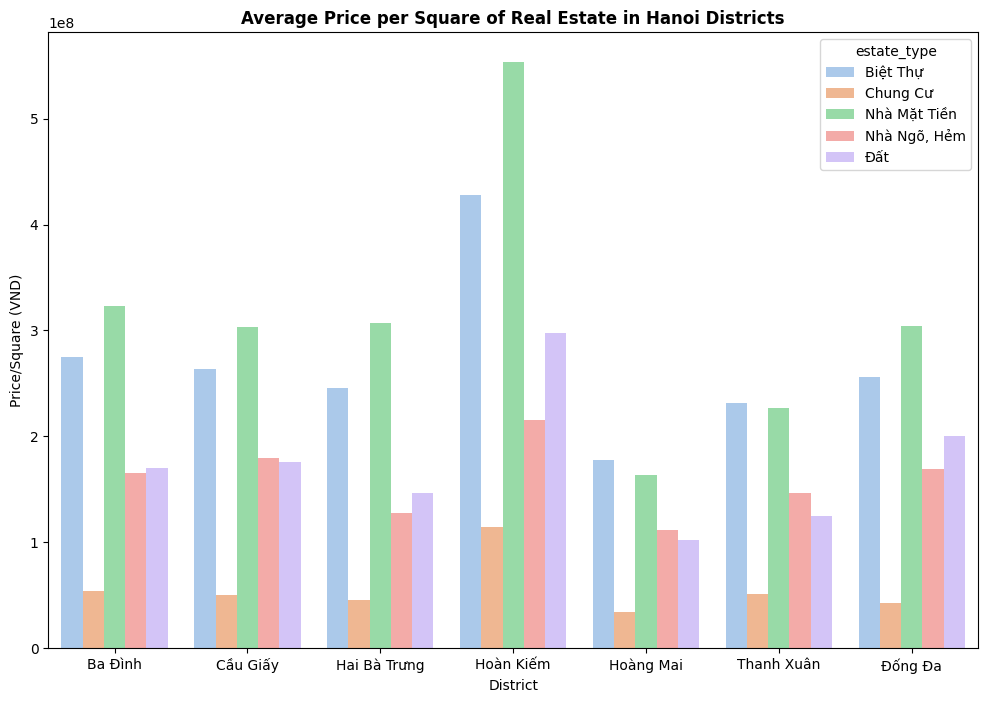

In [58]:
df_filtered_district = filtered_district[filtered_district['estate_type'].isin(filtered_estate_types)]
df_avg_price_per_square = df_filtered_district.groupby(['district', 'estate_type'])['price_per_square'].mean().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='district', y='price_per_square', hue='estate_type', data=df_avg_price_per_square, palette='pastel')

# Set the title and labels
plt.title('Average Price per Square of Real Estate in Hanoi Districts', fontsize=12, fontweight='bold')
plt.xlabel('District', fontsize=10)
plt.ylabel('Price/Square (VND)', fontsize=10)

plt.grid(False)
plt.show()

In [59]:
import matplotlib.ticker as mticker

df['year'] = df['post_date'].dt.year

# Group by year and district, and count the number of listings
df_grouped_year_district = filtered_district.groupby(['year', 'district']).size().reset_index(name='group_count')

# Plot the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='group_count', hue='district', data=df_grouped_year_district, marker="o", palette='Set1')

# Add labels and title
plt.title('The number of estates for sale in central districts by year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Real Estate', fontsize=10)

ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

KeyError: 'year'

In [60]:
# Group by year and district, and count the number of listings

df_grouped_avgpps_district = filtered_district.groupby(['year', 'district'])['price_per_square'].mean().reset_index(name='avgpps_district_count')

# Plot the line chart
plt.figure(figsize=(12, 8))
sns.lineplot(x='year', y='avgpps_district_count', hue='district', data=df_grouped_avgpps_district, marker="o", palette='Set1')

# Add labels and title
plt.title('Average price/square of estates in central districts by year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Price/square (VND)', fontsize=10)

ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.show()

KeyError: 'year'

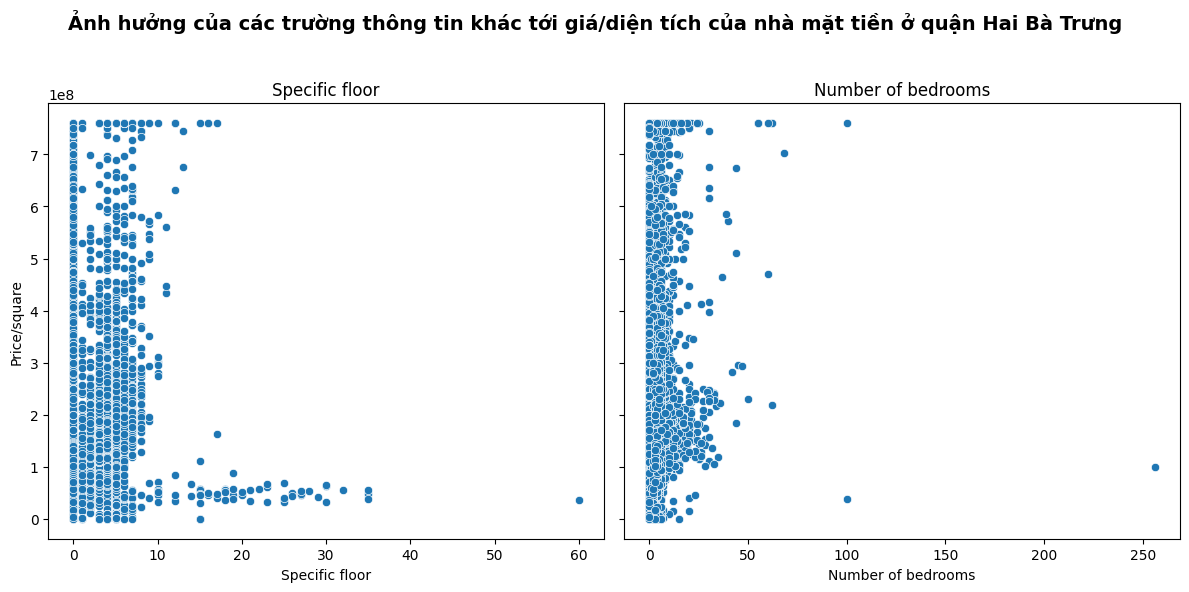

In [63]:
df_hbt = df[df['district'] == 'Hai Bà Trưng']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Scatter plot for price/square vs. number of floors
sns.scatterplot(x='specific_floor', y='price_per_square', data=df_hbt, ax=axes[0])
axes[0].set_title('Specific floor')
axes[0].set_xlabel('Specific floor')
axes[0].set_ylabel('Price/square')

# Scatter plot for price/square vs. number of bedrooms
sns.scatterplot(x='bedrooms', y='price_per_square', data=df_hbt, ax=axes[1])
axes[1].set_title('Number of bedrooms')
axes[1].set_xlabel('Number of bedrooms')

# Add a main title to the figure
fig.suptitle('Ảnh hưởng của các trường thông tin khác tới giá/diện tích của nhà mặt tiền ở quận Hai Bà Trưng', fontsize=14, fontweight='bold')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the title
plt.show()


In [64]:
df[df['bedroom'] == 60]

,title,description,price,square,address,estate_type,post_date,post_id,contact_info,extra_infos,link,price_per_square,district,ward,specific_floor,bedrooms,toilets,district_area (km2),year
5982,Căn Hộ Sunshine Garden- Diện Tích Rộng 108 M- ...,Căn Hộ Thuộc Tòa Nhà Sunshine Garden Dương Văn...,4.000000e+09,108.0,"Phường Vĩnh Tuy , Quận Hai Bà Trưng , Hà Nội",Chung Cư,2023-06-14,535616,"{'name': 'Vũ Minh Vượng', 'phone': ['084582458...","{'số phòng ngủ': '3', 'số toilet': '2', 'tầng'...",Https://Bds.Com.Vn/Can-Ho-Sunshine-Garden---Di...,3.703704e+07,Hai Bà Trưng,Phường Vĩnh Tuy,60,3,2,10.09,2023
19413,Tôi Cần Bán Căn Hộ Zen Park Ocean Park,Thông Tin- Lh 0912785252 Để Lấy Thông Tin,2.800000e+09,60.0,"Xã Kiêu Kỵ , Huyện Gia Lâm , Hà Nội",Chung Cư,2022-08-29,463760,"{'name': 'Nguyễn Thị Hoa Mỹ', 'phone': ['09181...","{'số toilet': '2', 'tầng': '60'}",Https://Bds.Com.Vn/Toi-Can-Ban-Can-Ho-Zen-Park...,4.666667e+07,Gia Lâm,Xã Kiêu Kỵ,60,0,2,114.73,2022
24906,"Bán Nhà Tô Vĩnh Diện, Thang Máy, Mới Tiện Nghi...","Thang Máy, Nhà Mới Koong.Phân Lô, Ô Tô Đỗ Cửa ...",7.600000e+09,50.0,"Phường Khương Mai , Quận Thanh Xuân , Hà Nội",Nhà Riêng,2022-07-26,429443,"{'name': 'Phạm Lộc', 'phone': ['0986792226']}","{'số phòng ngủ': '3', 'số toilet': '3', 'tầng'...",Https://Bds.Com.Vn/Ban-Nha-To-Vinh-Dien-Thang-...,1.520000e+08,Thanh Xuân,Phường Khương Mai,60,3,3,9.08,2022
